# 2.10 Improving chord notation


In [33]:
from pyknon.genmidi import Midi
from pyknon.music import Rest, Note, NoteSeq
from music_generation import *
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#   pattern_gen takes the chord pattern (scales): it reapeats the pattern as long the melody is, and generates the beat number where the chords change. 
# it also adds the end pattern
def pattern_gen(scales,end_scale, melody_len):
    bpb = 4  # beats per bar
    
#--Add note to chord
    scales = note_to_chord(scales)
    end_scale = note_to_chord(end_scale)
    
#--scales  
    factor = int(np.trunc(melody_len/(np.sum(scales[:,0]) * bpb)) + 1) # factor rounded up: how many times is the pattern used
    change_times = np.cumsum(np.tile(scales[:,0],factor)) * bpb        # create change time list with factor
    change_times = np.concatenate((np.asarray([0]),change_times))[:-1] # add 0 at beginig remove last element
    
    for i in range(len(scales)):          # send scales to scale_create
        scales[i,1] = scale_create(scales[i,1])
    pattern = np.tile(scales,(factor,1))   # tile the scales as long the melody is
    pattern[:,0] = change_times            #insert change_times into scales
    
#--end_scales 
    end_times = melody_len - np.cumsum(( end_scale[:,0]*bpb )[::-1])[::-1]   # reversed cumsum subtracted of melody_len
    end_scale[:,0] = end_times              #insert end_times into en_scale
    for i in range(len(end_scale)):         # send end_scale to scale_create
        end_scale[i,1] = scale_create(end_scale[i,1])

#--merge
    pattern = np.delete(pattern, np.argwhere(pattern[:,0] >= end_scale[0,0]) ,0) # remove unneeded scales
    pattern = np.concatenate((pattern,end_scale),axis=0)
    pattern = np.delete(pattern, np.argwhere(pattern[:,0] >= melody_len) ,0)     # remove if end is 0 bars
    return pattern

## Dictionary

In [35]:
C     = np.array([ 0, 4, 7])
Cm    = np.array([ 0, 3, 7])
Cdim  = np.array([ 0, 3, 6])

CM7   = np.array([ 0, 4, 7, 11])
C7    = np.array([ 0, 4, 7, 10])
Cm7   = np.array([ 0, 3, 7, 10])
Cdim7 = np.array([ 0, 3, 6, 10])
Cdim6 = np.array([ 0, 3, 6, 9 ])
C6    = np.array([ 0, 4, 7, 9 ]) # inversion of Am7
Cm6   = np.array([ 0, 3, 7, 9 ]) 

P = np.array([ 0,7])  # Power chord (Perfect unison, Perfect fifth)
B = np.array([ 0])    # Bass (Perfect unison)

major = np.array([ 0, 2, 4, 5, 7, 9, 11])
minor = np.array([ 0, 2, 3, 5, 7, 8, 10])  
blues = np.array([ 0, 3, 5, 6, 7, 10])

In [36]:
def note_to_chord(input_s):
    
    tone_dic = {           'C' : 0 , 'C#' : 1 , 
                'Db' : 1 , 'D' : 2 , 'D#' : 3 ,
                'Eb' : 3 , 'E' : 4 , 'E#' : 5 ,
                'Fb' : 4 , 'F' : 5 , 'F#' : 6 ,
                'Gb' : 6 , 'G' : 7 , 'G#' : 8 ,
                'Ab' : 8 , 'A' : 9 , 'A#' :10 ,
                'Bb' : 10, 'B' :11 , 'B#' :12 ,
                'Cb' : 11                      }
    
    input_s =np.asarray(input_s)
    le = len(input_s)
    out_s = [[0,1]]*le
    
    for sps in range(le):
        note = input_s[sps,1]
        nr = tone_dic[note]
        out_s[sps]= [input_s[sps,0]  ,   input_s[sps,2] + nr]
        
    out_s = np.asarray(out_s)
    return out_s

## tune_2.10

* Better understandable Chord notation
* Equal to tune_2.09_D 


* Chords:  Cm Cm7/Bb Eb Ab7 G7 | C C/E F F#dim Ab7 G7 Cm 
* Three guitars playing chords
* an accustic bass
* Organ for the base with seprat bass pattern. Mostly the root note.
* Vibraphone as solo voice

In [37]:
def tune_209_D():
    tune_name = 'tune_209_D'  
    np.random.seed(144    )    #  79 33
    bar, bpb = 17, 4  # bar: Takt , bpb: beat per bar
    melody_len = bar * bpb
    
    
 # | Cm Cm7/Bb Eb Ab7 G7 | C C/E F F#dim Ab7 G7 Cm |
    scales =[[1,'C',Cm],[1,'C',Cm7],[1,'Eb',C],[1,'Ab',C7],[1,'G',C7],[1,'C',C],[1,'C',C],[1,'F#',Cdim],[1,'Ab',C7],[1,'G',C7],[1,'C',Cm]] 
    bass1 =  [[1,'C',B],[1,'Bb',B], [1,'Eb',B],[1,'Ab',B], [1,'G',B], [1,'C',B],[1,'E',B],[1,'F#',B],   [1,'Ab',B], [1,'G',B], [1,'C',B]] 
    end_scale = [[0.5,'C',Cm],[0.5,'C',P]]
    
    pattern = pattern_gen(scales, end_scale, melody_len)
    bass1 = pattern_gen(bass1, end_scale, melody_len)
    
    
    # Solo voice
    range_1 = liniar_range(50,60,80,88)
    rythem1, notenr_1 = ran_duration([1/16,1/8, 1/4,1/2], [2,5,3,0.5], melody_len)
    melody1 = acceptance_melody([-2,-1, 0, 1, 2],[1, 3, 1, 3, 1],pattern, 70, range_1, notenr_1, rythem1)
    volumes1 = ran_volume([0,127], [1,4], notenr_1 )
    notes1 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody1,rythem1,volumes1)] )
    
    # Bass1  Accustic
    range_2 = liniar_range(38,41,52,67)
    rythem2, notenr_2 = ran_duration([1/8, 1/4,1/2], [4,4,1], melody_len)
    melody2 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 50, range_2, notenr_2,rythem2)
    volumes2 = ran_volume([0,60], [0,8], notenr_2 )
    notes2 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody2,rythem2,volumes2)] )
    
    # Bass2  Organ
    range_6 = liniar_range(30,38,50,62)
    rythem6, notenr_6 = ran_duration([1/8, 1/4,1/2], [0,1,1], melody_len)
    melody6 = acceptance_melody([-2,-1, 0, 1, 2],[1, 1, 1, 1, 1],bass1, 48, range_6, notenr_6,rythem6)
    volumes6 = ran_volume([0,110], [0,8], notenr_6 )
    notes6 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody6,rythem6,volumes6)] )
    
    # Chord Voices
    range_3 = liniar_range(40,50,67,72)
    rythem3, notenr_3 = ran_duration([1/8, 1/4,1/2], [1,2,1], melody_len)
    melody3 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 65, range_3, notenr_3,rythem3)
    volumes3 = ran_volume([0,80], [0,8], notenr_3 )
    notes3 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody3,rythem3,volumes3)] )
    
    range_4 = liniar_range(40,50,67,72)
    rythem4, notenr_4 = ran_duration([1/8, 1/4,1/2], [1,2,1], melody_len)
    melody4 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 60, range_4, notenr_4,rythem4)
    volumes4 = ran_volume([0,90], [0,8], notenr_4 )
    notes4 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody4,rythem4,volumes4)] )
    
    range_5 = liniar_range(40,50,67,72)
    rythem5, notenr_5 = ran_duration([1/8, 1/4,1/2], [1,2,1], melody_len)
    melody5 = acceptance_melody([-2,-1, 0, 1, 2],[0, 3, 1, 3, 0],pattern, 54, range_5, notenr_5,rythem5)
    volumes5 = ran_volume([0,90], [0,8], notenr_5 )
    notes5= NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody5,rythem5,volumes5)] )
    
    
    plot_range([range_1,range_2,range_3],['range_1','range_2','range_3'],tune_name)
    instruments = [11,32,24,24,24,16]
    notes = [notes1,notes2,notes3,notes4,notes5,notes6]
    return notes, instruments,tune_name


__Instruments:__
Available are at lest the 128 General-Midi (GM) Instruments. Depending on the sound-fonts there is a bigger choise. A list of the GM instruments can be found here. https://jazz-soft.net/demo/GeneralMidi.html


In [38]:

def gen_midi():
#     squezze into a MIDI framework
    notes, instruments, tune_name = tune_209_D() #  <--- select a tune  <<--     <<<<<<<<<--- select a tune -----
    nTracks = len(notes)
    
    m = Midi(number_tracks=nTracks, tempo=120, instrument=instruments)
    for iTrack in range(nTracks):
        m.seq_notes(notes[iTrack], track=iTrack)

    #--- write the MIDI file -----
    midi_file_name = tune_name +'.mid'   # set the name of the file
    m.write(midi_file_name)
    return midi_file_name

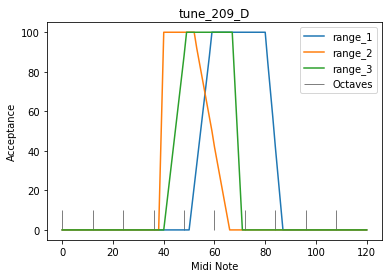

In [39]:
######---  Main  ---######
midi_file_name = gen_midi()

midi_play(midi_file_name)
midi_audio(midi_file_name)
midi_png(midi_file_name)

## External __Music_Generation__ library
This library changes from version to version. New or changed code is first explaind above. This is a copy of music_generation.py 